<a href="https://colab.research.google.com/github/Evianitary18/Programming-With-Python/blob/main/Evianita_Rifka_Yulistia__Kelompok_1_Praktik2_Modul4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anda merupakan seorang Marketing Data Analyst di sebuah perusahaan e-commerce yang bergerak di bidang teknologi. Saat ini, perusahaan ingin memfokuskan untuk menjual produk teknologi berupa laptop dan notebook. Untuk itu sebagai Marketing Data Analyst, Anda diminta untuk memberikan insight kepada perusahaan guna meningkatkan jumlah revenue dengan melakukan analisa data untuk mendapatkan beberapa informasi terkait strategi marketing.

1. Supervisor memberikan Anda data-data pelanggan yang bisa diakses pada LINK berikut. Anda diminta untuk:

    a. Membuat segmentasi atau cluster pelanggan

            i. Pastikan kolom Dt_Customer diubah menjadi kolom Years_Since_Registration (Menunjukkan jumlah tahun pelanggan sejak mendaftar sampai tahun sekarang)

           ii. Pastikan kolom Year_Birth diubah menjadi kolom Age (Menunjukkan usia pelanggan tahun sekarang)

    b. Informasikan karakteristik dari pelanggan pada masing-masing cluster tersebut. Anda dapat menamakan cluster tersebut sesuai dengan karakteristik pelanggan.

2. Selain itu, Anda juga diberikan referensi data-data kumpulan laptop dari e-commerce lain yang bisa diakses pada LINK berikut. Anda diminta untuk:

    a. Memberikan informasi terkait spesifikasi laptop apa saja yang paling mempengaruhi tinggi dan rendahnya harga laptop

    b. Membuat sebuah persamaan model regresi linear untuk memprediksi harga dari sebuah laptop berdasarkan spesifikasi

    c. Adapun variabel yang termasuk ke dalam spesifikasi laptop yaitu :

Company
TypeName
RAM
Weight
Touchscreen
Ips
Ppi
Cpu_brand
HDD
SSD
Gpu_brand
Os

3. Insight dan rekomendasi dari hasil pertanyaan 1 dan 2

# Data Cleaning Customer Data.xlsx



**Persiapan Data**

In [ ]:
# Mengimpor Library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# code ini untuk menghilangkan warning message saat kita menjalankan code-code
# kita di bawah
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Membuka data dari file excel
Data = 'customer_data.xlsx'
df = pd.read_excel(Data)

In [ ]:
# tampilkan jumlah baris data
df.shape

(2240, 9)

In [ ]:
# Menampilkan 10 baris pertama
df.head(10)

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,58138.0,2012-09-04,58,8,4,7
1,2174,1954,Graduation,46344.0,2014-03-08,38,1,2,5
2,4141,1965,Graduation,71613.0,2013-08-21,26,8,10,4
3,6182,1984,Graduation,26646.0,2014-02-10,26,2,4,6
4,5324,1981,PhD,58293.0,2014-01-19,94,5,6,5
5,7446,1967,Master,62513.0,2013-09-09,16,6,10,6
6,965,1971,Graduation,55635.0,2012-11-13,34,7,7,6
7,6177,1985,PhD,33454.0,2013-05-08,32,4,4,8
8,4855,1974,PhD,30351.0,2013-06-06,19,3,2,9
9,5899,1950,PhD,5648.0,2014-03-13,68,1,0,20


**Pengecekan Missing Value**

In [ ]:
# Pengecekan missing value
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Income,24
Dt_Customer,0
Recency,0
NumWebPurchases,0
NumStorePurchases,0
NumWebVisitsMonth,0


In [ ]:
# Untuk melihat summary data kita
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2240 non-null   int64         
 1   Year_Birth         2240 non-null   int64         
 2   Education          2240 non-null   object        
 3   Income             2216 non-null   float64       
 4   Dt_Customer        2240 non-null   datetime64[ns]
 5   Recency            2240 non-null   int64         
 6   NumWebPurchases    2240 non-null   int64         
 7   NumStorePurchases  2240 non-null   int64         
 8   NumWebVisitsMonth  2240 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 157.6+ KB


In [ ]:
# hitung proporsi missing value di tiap kolom
df.isna().sum()/df.shape[0] * 100
# dikali 100 agar jadi persen

# shape[0] untuk mengambil jumlah baris

,0
ID,0.000000
Year_Birth,0.000000
Education,0.000000
Income,1.071429
Dt_Customer,0.000000
Recency,0.000000
NumWebPurchases,0.000000
NumStorePurchases,0.000000
NumWebVisitsMonth,0.000000


In [ ]:
# hitung proporsi juga bisa jadi mean
df.isna().mean()

# menghitung jumlah baris/total baris keseluruhan

,0
ID,0.000000
Year_Birth,0.000000
Education,0.000000
Income,0.010714
Dt_Customer,0.000000
Recency,0.000000
NumWebPurchases,0.000000
NumStorePurchases,0.000000
NumWebVisitsMonth,0.000000


In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di kolom untuk memastikan.
# Kita akan mengecek income
df[df['Income'].isna()]

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
10,1994,1983,Graduation,NaN,2013-11-15,11,1,2,7
27,5255,1986,Graduation,NaN,2013-02-20,19,27,0,1
43,7281,1959,PhD,NaN,2013-11-05,80,1,4,2
48,7244,1951,Graduation,NaN,2014-01-01,96,2,4,6
58,8557,1982,Graduation,NaN,2013-06-17,57,2,3,6
71,10629,1973,2n Cycle,NaN,2012-09-14,25,3,3,8
90,8996,1957,PhD,NaN,2012-11-19,4,7,8,9
91,9235,1957,Graduation,NaN,2014-05-27,45,1,2,7
92,5798,1973,Master,NaN,2013-11-23,87,2,8,1
128,8268,1961,PhD,NaN,2013-07-11,23,6,7,6


**Menghapus Nilai Missing Value**

In [ ]:
# Hitung jumlah nilai NaN di kolom 'Income'
null_count = df['Income'].isnull().sum()
print("Jumlah nilai NaN di kolom 'Income':", null_count)

Jumlah nilai NaN di kolom 'Income': 24


In [ ]:
# Kita cek jumlah baris data kita terlebih dahulu
df.shape[0]

2240

Jumlah nilai kosong dalam kolom income terdapat 24. Dikarenakan presentasenya kecil tidak sampai 10% menurut saya lebih baik dihapus saja.

In [ ]:
# menghapus data Income yang kosong
df = df.dropna(subset=['Income'])

In [ ]:
# Kita cek jumlah baris data kita terlebih dahulu
df.shape[0]

2216

Jumlah baris yang awalnya 2240 sekarang menjadi 2216 karena nilai NaN di kolom Income sudah dihapus semua.

In [ ]:
# Pengecekan missing value
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Income,0
Dt_Customer,0
Recency,0
NumWebPurchases,0
NumStorePurchases,0
NumWebVisitsMonth,0


**Pengecekan Nilai Duplicate**

In [ ]:
# Pengecekan Data Duplicate
df.duplicated().sum()

0

**Pengecekan Typo**

**Kolom Id**

In [ ]:
# mari kita lihat isi dari kolom ID
df["ID"].unique()

array([5524, 2174, 4141, ..., 7270, 8235, 9405])

In [ ]:
# mari kita lihat isi dari kolom ID
df['ID'].value_counts()

,count
ID,
5524,1
6885,1
3478,1
7494,1
1763,1
...,...
7235,1
3560,1
5278,1


**Kolom Year_Birth**

In [ ]:
# mari kita lihat isi dari kolom Year Birth
df["Year_Birth"].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1976,
       1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1989,
       1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955,
       1966, 1988, 1948, 1958, 1972, 1960, 1983, 1945, 1991, 1962, 1953,
       1956, 1992, 1961, 1900, 1986, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [ ]:
# mari kita lihat isi dari kolom Year Birth
df['Year_Birth'].value_counts()

,count
Year_Birth,
1976,89
1971,86
1975,83
1972,78
1978,76
1970,75
1965,74
1973,72
1969,70


**Kolom Education**

In [ ]:
# mari kita lihat isi dari kolom Education
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
# mari kita lihat isi dari kolom name
df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


**Kolom Income**

In [ ]:
# mari kita lihat isi dari kolom Income
df["Income"].unique()

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

In [ ]:
# mari kita lihat isi dari kolom name
df['Income'].value_counts()

,count
Income,
7500.0,12
35860.0,4
37760.0,3
83844.0,3
63841.0,3
...,...
40760.0,1
41452.0,1
6835.0,1


**Kolom Dt_Customer**

In [ ]:
# mari kita lihat isi dari kolom Dt_Customer
df["Dt_Customer"].unique()

<DatetimeArray>
['2012-09-04 00:00:00', '2014-03-08 00:00:00', '2013-08-21 00:00:00',
 '2014-02-10 00:00:00', '2014-01-19 00:00:00', '2013-09-09 00:00:00',
 '2012-11-13 00:00:00', '2013-05-08 00:00:00', '2013-06-06 00:00:00',
 '2014-03-13 00:00:00',
 ...
 '2014-03-27 00:00:00', '2012-12-15 00:00:00', '2012-09-17 00:00:00',
 '2013-06-02 00:00:00', '2012-12-21 00:00:00', '2013-11-01 00:00:00',
 '2013-08-10 00:00:00', '2012-10-11 00:00:00', '2012-12-20 00:00:00',
 '2014-01-09 00:00:00']
Length: 662, dtype: datetime64[ns]

In [ ]:
# mari kita lihat isi dari kolom Dt_Customer
df['Dt_Customer'].value_counts()

,count
Dt_Customer,
2012-08-31,12
2012-09-12,11
2013-02-14,11
2014-05-12,11
2013-08-20,10
...,...
2012-08-05,1
2012-11-18,1
2014-05-09,1


In [ ]:
# Mengubah kolom Dt_Customer menjadi datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

**Kolom Recency**

In [ ]:
# mari kita lihat isi dari kolom Recency
df["Recency"].unique()

array([58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 53, 23, 51, 20, 91, 86,
       41, 42, 63,  0, 69, 89,  4, 96, 56, 31,  8, 55, 37, 76, 99,  3, 88,
       72, 24, 92, 39, 29,  2, 54, 57, 30, 12, 18, 75, 90,  1, 40,  9, 87,
        5, 95, 48, 70, 79, 84, 44, 43, 35, 15, 17, 46, 27, 25, 74, 85, 65,
       13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 80, 45,
       14, 52, 93, 50, 60, 11, 66, 97, 62,  6, 33, 22, 71, 67,  7])

In [ ]:
# mari kita lihat isi dari kolom Recency
df['Recency'].value_counts()

,count
Recency,
56,37
30,32
54,32
46,31
92,30
...,...
41,15
59,14
22,13


**Kolom NumWebPurchases**

In [ ]:
# mari kita lihat isi dari kolom NumWebPurchases
df["NumWebPurchases"].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 10,  9, 23, 27, 25])

In [ ]:
# mari kita lihat isi dari kolom NumWebPurchases
df['NumWebPurchases'].value_counts()

,count
NumWebPurchases,
2,368
1,348
3,334
4,277
5,219
6,201
7,154
8,102
9,75


**Kolom NumStorePurchases**

In [ ]:
# mari kita lihat isi dari kolom NumStorePurchases
df["NumStorePurchases"].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1])

In [ ]:
# mari kita lihat isi dari kolom NumStorePurchases
df['NumStorePurchases'].value_counts()

,count
NumStorePurchases,
3,484
4,319
2,220
5,211
6,177
8,147
7,141
10,124
9,106


**Kolom NumWebVisitsMonth**

In [ ]:
# mari kita lihat isi dari kolom NumWebVisitsMonth
df["NumWebVisitsMonth"].unique()

array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13])

In [ ]:
# mari kita lihat isi dari kolom NumWebVisitsMonth
df['NumWebVisitsMonth'].value_counts()

,count
NumWebVisitsMonth,
7,387
8,340
6,335
5,279
4,217
3,203
2,201
1,150
9,82


**Outlier**

**Cek Outlier Income**

In [ ]:
# Tentukan kolom yang ingin diperiksa, misalnya 'income'
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai data yang termasuk outlier
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

# Menampilkan jumlah total outlier
print(f"Jumlah total outlier di kolom Income : {len(outliers)}")



Jumlah total outlier di kolom Income : 8


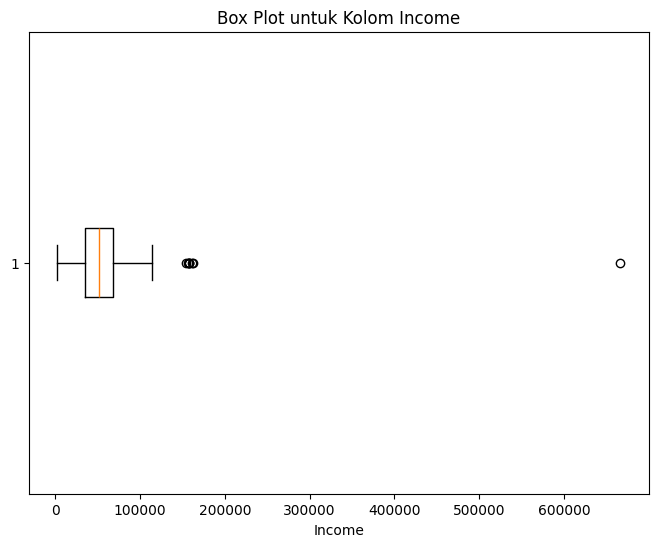

In [ ]:
# Membuat box plot untuk kolom 'Income'
plt.figure(figsize=(8, 6))
plt.boxplot(df['Income'], vert=False)
plt.xlabel('Income')
plt.title('Box Plot untuk Kolom Income')
plt.show()

Dari visualisasi di atas bisa dilihat terdapat outlier pada kolom income. Karena outliernya sedikit, saya memutuskan untuk menghapusnya saja.

In [ ]:
# Menghapus baris yang merupakan outlier pada kolom 'Income'
data_no_outliers = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

# Menampilkan jumlah data setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {data_no_outliers.shape[0]}")

Jumlah data setelah menghapus outlier: 2208


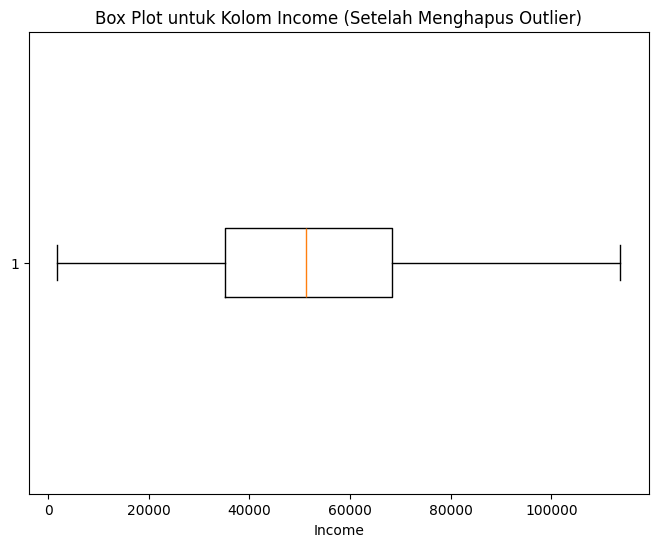

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_no_outliers['Income'], vert=False)
plt.xlabel('Income')
plt.title('Box Plot untuk Kolom Income (Setelah Menghapus Outlier)')
plt.show()


# No.1

a. Membuat segmentasi atau cluster pelanggan

            i. Pastikan kolom Dt_Customer diubah menjadi kolom Years_Since_Registration (Menunjukkan jumlah tahun pelanggan sejak mendaftar sampai tahun sekarang)

           ii. Pastikan kolom Year_Birth diubah menjadi kolom Age (Menunjukkan usia pelanggan tahun sekarang)

In [ ]:
# Convert 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [ ]:
# Get the current year
current_year = datetime.now().year

In [ ]:
# Create 'Years_Since_Registration' and 'Age' columns
df['Years_Since_Registration'] = current_year - df['Dt_Customer'].dt.year
df['Age'] = current_year - df['Year_Birth']

In [ ]:
# Periksa perubahan
df.head()

,ID,Year_Birth,Education,Income,Dt_Customer,Recency,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Years_Since_Registration,Age
0,5524,1957,Graduation,58138.0,2012-09-04,58,8,4,7,12,67
1,2174,1954,Graduation,46344.0,2014-03-08,38,1,2,5,10,70
2,4141,1965,Graduation,71613.0,2013-08-21,26,8,10,4,11,59
3,6182,1984,Graduation,26646.0,2014-02-10,26,2,4,6,10,40
4,5324,1981,PhD,58293.0,2014-01-19,94,5,6,5,10,43


b. Informasikan karakteristik dari pelanggan pada masing-masing cluster tersebut. Anda dapat menamakan cluster tersebut sesuai dengan karakteristik pelanggan.

In [ ]:
# Selecting features for clustering
features = df[['Age', 'Income', 'Years_Since_Registration', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].dropna()

In [ ]:
# Standardizing the data (optional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

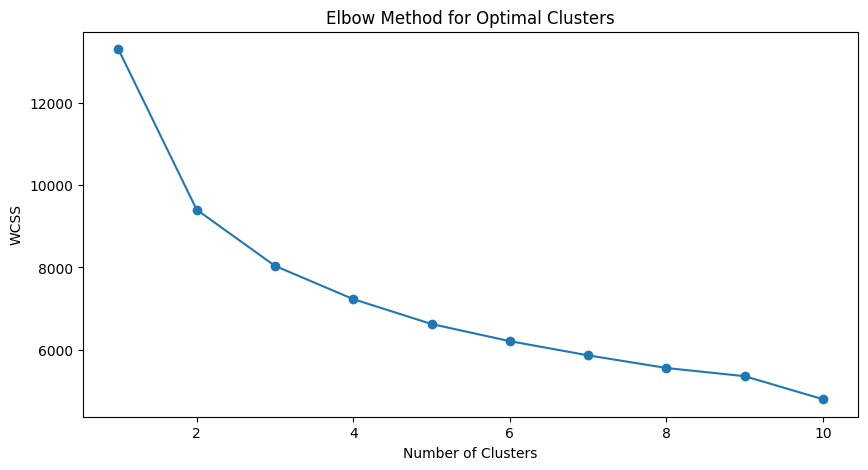

In [ ]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Applying KMeans with an optimal number of clusters (e.g., 3 based on the elbow graph)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [ ]:
# Understanding the characteristics of each cluster by selecting only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns  # Pilih kolom numerik saja
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()

# Display the cluster summary
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
                   ID   Year_Birth        Income    Recency  NumWebPurchases  \
Cluster                                                                       
0        5606.139774  1972.010277  33459.902364  48.855087         2.034943   
1        5402.115073  1965.508914  59519.317666  48.557536         7.090762   
2        5744.268371  1967.126198  74281.158147  49.706070         4.309904   

         NumStorePurchases  NumWebVisitsMonth  Years_Since_Registration  \
Cluster                                                                   
0                 3.109969           6.603289                 10.874615   
1                 7.559157           6.207455                 11.382496   
2                 8.250799           2.447284                 10.717252   

               Age  Cluster  
Cluster                      
0        51.989723      0.0  
1        58.491086      1.0  
2        56.873802      2.0  


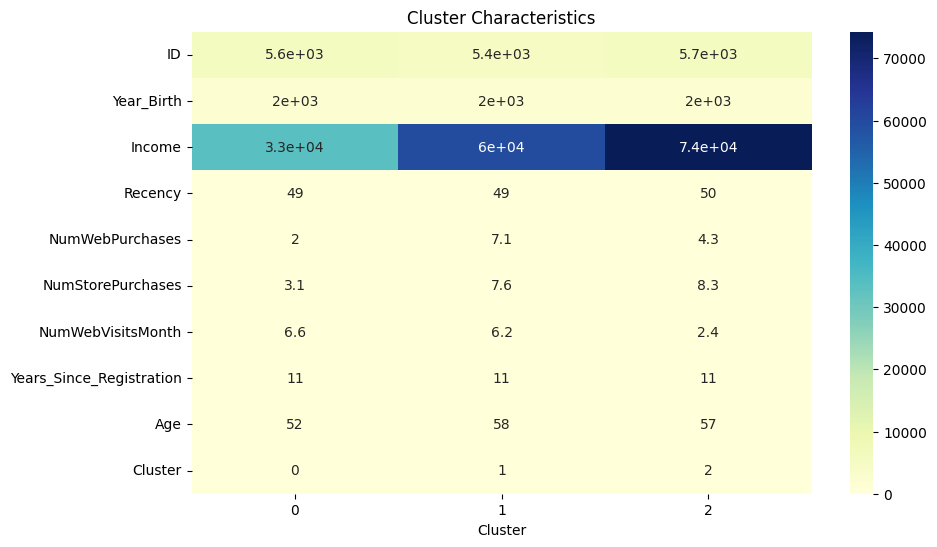

In [ ]:
# Plotting characteristics of each cluster for visualization
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary.T, cmap="YlGnBu", annot=True)
plt.title("Cluster Characteristics")
plt.show()

In [ ]:
# Mapping cluster names based on income characteristics
cluster_name_mapping = {
    0: 'Pendapatan Rendah',      # Mengganti cluster 0 dengan Pendapatan Rendah
    1: 'Pendapatan Menengah',     # Mengganti cluster 1 dengan Pendapatan Menengah
    2: 'Pendapatan Tinggi'        # Mengganti cluster 2 dengan Pendapatan Tinggi
}

# Apply the mapping to the Cluster column
df['Cluster'] = df['Cluster'].replace(cluster_name_mapping)

# Select only numeric columns for the summary
numeric_cols = df.select_dtypes(include=['number']).columns

# Display the updated DataFrame with descriptive cluster names
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()
print("Cluster Summary with Descriptive Names:\n", cluster_summary)

Cluster Summary with Descriptive Names:
                               ID   Year_Birth        Income    Recency  \
Cluster                                                                  
Pendapatan Menengah  5402.115073  1965.508914  59519.317666  48.557536   
Pendapatan Rendah    5606.139774  1972.010277  33459.902364  48.855087   
Pendapatan Tinggi    5744.268371  1967.126198  74281.158147  49.706070   

                     NumWebPurchases  NumStorePurchases  NumWebVisitsMonth  \
Cluster                                                                      
Pendapatan Menengah         7.090762           7.559157           6.207455   
Pendapatan Rendah           2.034943           3.109969           6.603289   
Pendapatan Tinggi           4.309904           8.250799           2.447284   

                     Years_Since_Registration        Age  
Cluster                                                   
Pendapatan Menengah                 11.382496  58.491086  
Pendapatan Rendah   

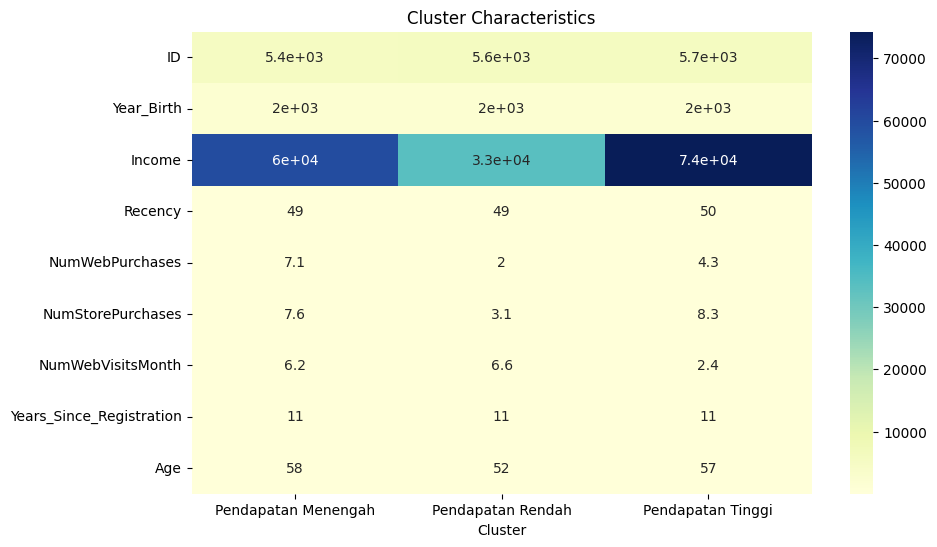

In [ ]:
# Plotting characteristics of each cluster for visualization
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary.T, cmap="YlGnBu", annot=True)
plt.title("Cluster Characteristics")
plt.show()

# Data Cleaning Laptop

In [ ]:
#Membaca Data Customer
data = pd.read_csv('laptop_data.csv')
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
data.shape

(1273, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


**Pengecekan Missing Value**

In [ ]:
# Pengecekan missing value
data.isnull().sum()


,0
Company,0
TypeName,0
Ram,0
Weight,0
Price,0
TouchScreen,0
Ips,0
Ppi,0
Cpu_brand,0
HDD,0


**Pengecekan Duplikat**

In [ ]:
# Pengecekan Data Duplicate
data.duplicated().sum()

1

In [ ]:
# hapus data duplikat
data = data.drop_duplicates().reset_index(drop=True)

In [ ]:
# Hapus data duplikat dengan inplace=True, lalu reset indeks terpisah
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

**Pengecekan Typo**

In [ ]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


**Kolom Company**

In [ ]:
# mari kita lihat isi dari kolom name
data["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [ ]:
#menampilkan kolom company
data['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,47
Apple,21
Samsung,8


**Kolom Type Name**

In [ ]:
#menampilkan kolom TypeName
data['TypeName'].value_counts()

,count
TypeName,
Notebook,705
Gaming,205
Ultrabook,194
2 in 1 Convertible,116
Workstation,29
Netbook,23


**Kolom Name**

In [ ]:
#menampilkan kolom Ram
data['Ram'].value_counts()

,count
Ram,
8,613
4,364
16,198
6,35
12,25
32,17
2,16
24,3
64,1


**Kolom Weigt**

In [ ]:
#menampilkan kolom Weight
data['Weight'].value_counts()

,count
Weight,
2.20,119
2.10,58
2.00,45
2.40,42
2.50,38
...,...
4.50,1
1.14,1
3.80,1


**Kolom Price**

In [ ]:
#menampilkan kolom Price
data['Price'].value_counts()

,count
Price,
10.977717,14
11.470547,14
11.288115,12
11.064804,11
11.144911,11
...,...
11.620480,1
9.692589,1
10.607563,1


**Kolom TouchScreen**

In [ ]:
#menampilkan kolom TouchScreen
data['TouchScreen'].value_counts()

,count
TouchScreen,
0,1085
1,187


**Kolom Ips**

In [ ]:
#menampilkan kolom Ips
data['Ips'].value_counts()

,count
Ips,
0,916
1,356


**Kolom Ppi**

In [ ]:
#menampilkan kolom Ppi
data['Ppi'].value_counts()

,count
Ppi,
141.211998,426
100.454670,197
157.350512,131
127.335675,131
165.632118,107
111.935204,43
135.094211,29
176.232574,25
276.053530,25


**Kolom Cpu Brand**

In [ ]:
#menampilkan kolom Cpu_brand
data['Cpu_brand'].value_counts()

,count
Cpu_brand,
Intel Core i7,515
Intel Core i5,422
Other Intel Processor,141
Intel Core i3,134
AMD Processor,60


**Kolom HDD**

In [ ]:
#menampilkan kolom HDD
data['HDD'].value_counts()

,count
HDD,
0,713
1000,400
500,125
2000,32
32,1
128,1


**Kolom SSD**

In [ ]:
#menampilkan kolom SSD
data['SSD'].value_counts()

,count
SSD,
256,498
0,436
128,169
512,134
1000,16
32,6
180,5
16,3
64,1


**Kolom GPU**

In [ ]:
#menampilkan kolom Gpu_brand
data['Gpu_brand'].value_counts()

,count
Gpu_brand,
Intel,702
Nvidia,396
AMD,174


**Kolom OS**

In [ ]:
#menampilkan kolom Os
data['Os'].value_counts()

,count
Os,
Windows,1099
Others,152
Mac,21


# Outlier

In [ ]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


**Outlier Weight**

In [ ]:
# Tentukan kolom yang ingin diperiksa, misalnya 'Weight'
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai data yang termasuk outlier
outliers = data[(data['Weight'] < lower_bound) | (data['Weight'] > upper_bound)]

# Menampilkan jumlah total outlier
print(f"Jumlah total outlier di kolom Weight : {len(outliers)}")

Jumlah total outlier di kolom Weight : 45


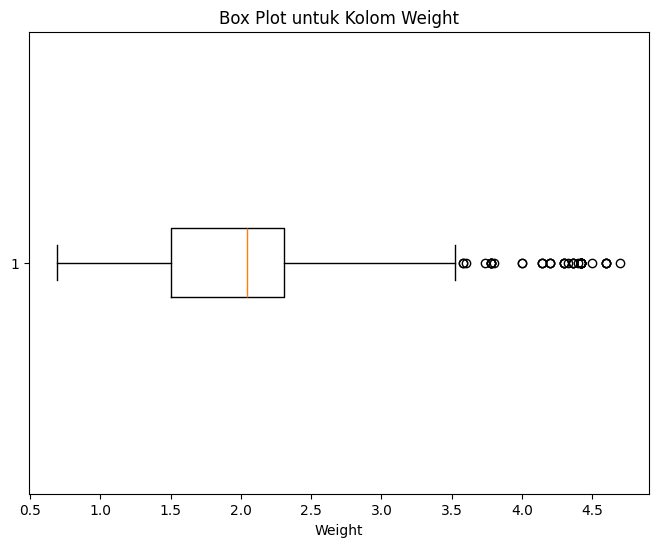

In [ ]:
# Membuat box plot untuk kolom 'Weight'
plt.figure(figsize=(8, 6))
plt.boxplot(data['Weight'], vert=False)
plt.xlabel('Weight')
plt.title('Box Plot untuk Kolom Weight')
plt.show()

In [ ]:
# Menghapus baris yang merupakan outlier pada kolom 'Weight'
data_no_outliers = data[(data['Weight'] >= lower_bound) & (data['Weight'] <= upper_bound)]

# Menampilkan jumlah data setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {data_no_outliers.shape[0]}")

Jumlah data setelah menghapus outlier: 1227


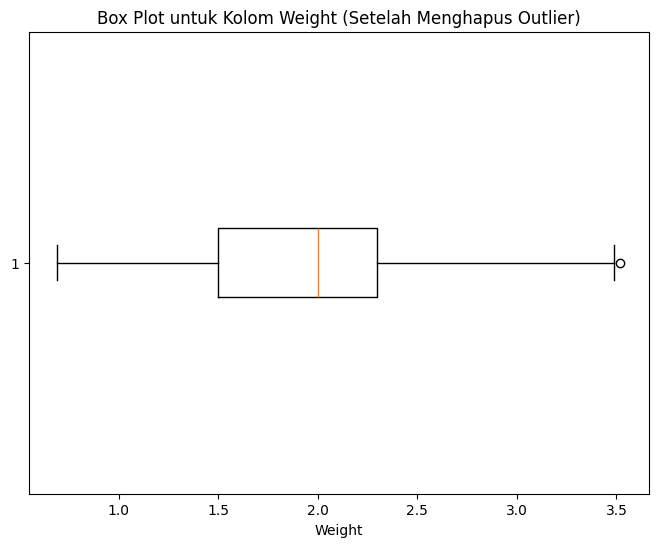

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_no_outliers['Weight'], vert=False)
plt.xlabel('Weight')
plt.title('Box Plot untuk Kolom Weight (Setelah Menghapus Outlier)')
plt.show()

**Outlier Price**

In [ ]:
# Tentukan kolom yang ingin diperiksa, misalnya 'Price'
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai data yang termasuk outlier
outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]

# Menampilkan jumlah total outlier
print(f"Jumlah total outlier di kolom Price : {len(outliers)}")

Jumlah total outlier di kolom Price : 1


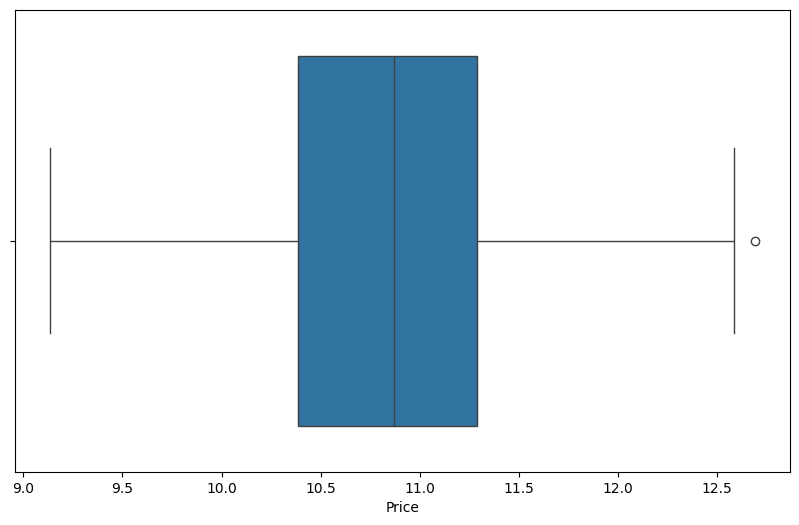

In [ ]:
# mengecek outlier dari kolom Price
plt.figure(figsize=(10,6))
sns.boxplot(x='Price',data = data)
plt.show()

In [ ]:
# Menghapus baris yang merupakan outlier pada kolom 'Price'
data_no_outliers = data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]

# Menampilkan jumlah data setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {data_no_outliers.shape[0]}")

Jumlah data setelah menghapus outlier: 1271


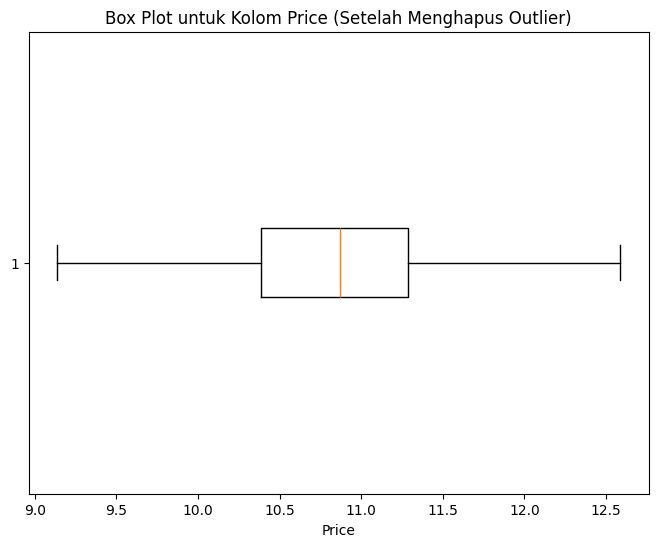

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_no_outliers['Price'], vert=False)
plt.xlabel('Price')
plt.title('Box Plot untuk Kolom Price (Setelah Menghapus Outlier)')
plt.show()


**Kolom PPI**

In [ ]:
# Tentukan kolom yang ingin diperiksa, misalnya 'Ppi'
Q1 = data['Ppi'].quantile(0.25)
Q3 = data['Ppi'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai data yang termasuk outlier
outliers = data[(data['Ppi'] < lower_bound) | (data['Ppi'] > upper_bound)]

# Menampilkan jumlah total outlier
print(f"Jumlah total outlier di kolom Ppi : {len(outliers)}")

Jumlah total outlier di kolom Ppi : 113


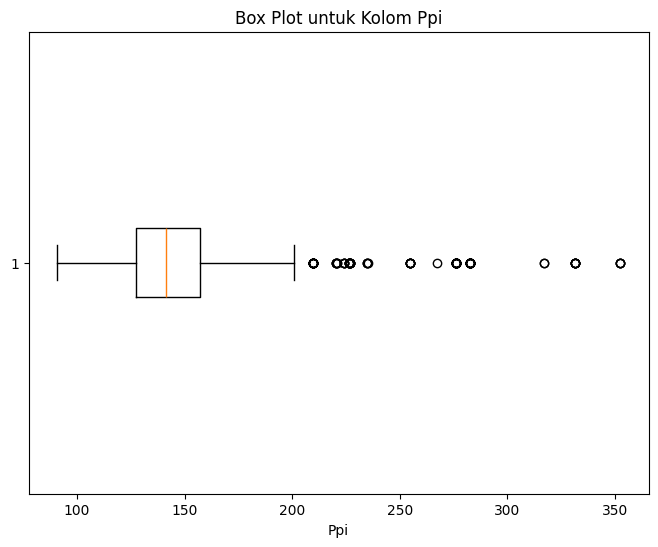

In [ ]:
# Membuat box plot untuk kolom 'Ppi'
plt.figure(figsize=(8, 6))
plt.boxplot(data['Ppi'], vert=False)
plt.xlabel('Ppi')
plt.title('Box Plot untuk Kolom Ppi')
plt.show()

In [ ]:
# Menghapus baris yang merupakan outlier pada kolom 'Ppi'
data_no_outliers = data[(data['Ppi'] >= lower_bound) & (data['Ppi'] <= upper_bound)]

# Menampilkan jumlah data setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {data_no_outliers.shape[0]}")

Jumlah data setelah menghapus outlier: 1159


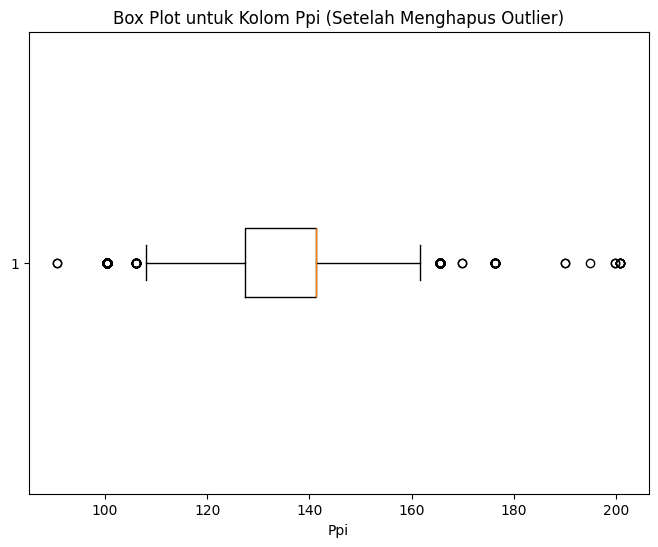

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_no_outliers['Ppi'], vert=False)
plt.xlabel('Ppi')
plt.title('Box Plot untuk Kolom Ppi (Setelah Menghapus Outlier)')
plt.show()

# Final Data

In [ ]:
data.shape

(1272, 13)

In [ ]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


# No. 2

Selain itu, Anda juga diberikan referensi data-data kumpulan laptop dari e-commerce lain yang bisa diakses pada LINK berikut. Anda diminta untuk:

    a. Memberikan informasi terkait spesifikasi laptop apa saja yang paling mempengaruhi tinggi dan rendahnya harga laptop

    b. Membuat sebuah persamaan model regresi linear untuk memprediksi harga dari sebuah laptop berdasarkan spesifikasi

    c.  c. Adapun variabel yang termasuk ke dalam spesifikasi laptop yaitu :

0. Company
1.  TypeName
2. RAM
3. Weight
4. Touchscreen
5. Ips
6. Ppi
7. Cpu_brand
8. HDD
9. SSD
10. Gpu_brand
11. Os

In [ ]:

# Buat objek OneHotEncoder dan atur agar mengabaikan kategori yang tidak dikenal
encoder = OneHotEncoder(handle_unknown='ignore')

# Tentukan kolom kategori yang akan diencode
kategori_kolom = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']

# Terapkan one-hot encoding pada kolom-kolom tersebut
data_encoded = encoder.fit_transform(data[kategori_kolom]).toarray()

# Buat DataFrame baru dari hasil encoding dengan nama fitur yang sesuai
nama_fitur = encoder.get_feature_names_out(kategori_kolom)
df_encoded = pd.DataFrame(data_encoded, columns=nama_fitur)

# Gabungkan DataFrame hasil encoding ke DataFrame asli
data = pd.concat([data, df_encoded], axis=1)

# Hapus kolom asli yang sudah diencode
data.drop(columns=kategori_kolom, inplace=True)

# Lihat hasil
data.head()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Acer,Company_Apple,...,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Mac,Os_Others,Os_Windows
0,8,1.37,11.175755,0,1,226.983005,0,128,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,8,1.34,10.776777,0,0,127.677940,0,0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,8,1.86,10.329931,0,0,141.211998,0,256,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,16,1.83,11.814476,0,1,220.534624,0,512,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,8,1.37,11.473101,0,1,226.983005,0,256,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


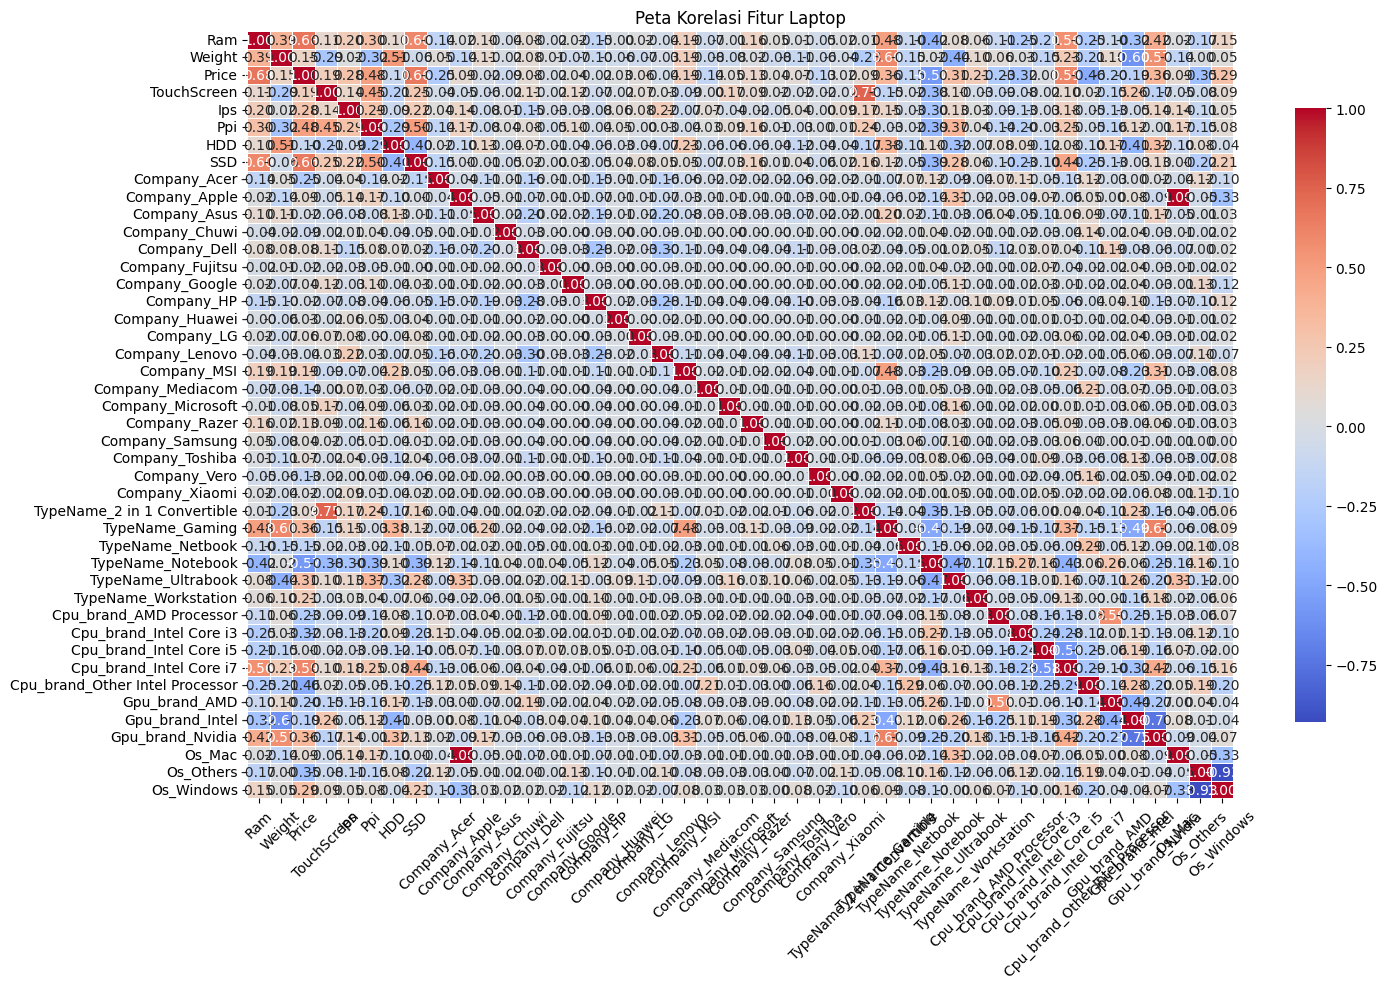

In [ ]:
# Menghitung matriks korelasi untuk melihat hubungan antar fitur
corr_matrix = data.corr()

# Atur ukuran figure dan buat heatmap untuk visualisasi korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': .8})
plt.title('Peta Korelasi Fitur Laptop')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Menghitung korelasi antara setiap fitur dengan harga
corr_with_price = data.corr()['Price'].drop('Price')  # Menghapus korelasi harga dengan dirinya sendiri

# Mengurutkan fitur berdasarkan korelasi dengan harga
corr_with_price = corr_with_price.sort_values(ascending=False)

# Tampilkan hasil korelasi setiap fitur dengan harga
print("Korelasi Fitur dengan Harga:\n", corr_with_price)

Korelasi Fitur dengan Harga:
 Ram                                0.681019
SSD                                0.658962
Cpu_brand_Intel Core i7            0.593680
Ppi                                0.480621
TypeName_Gaming                    0.362714
Gpu_brand_Nvidia                   0.357440
TypeName_Ultrabook                 0.306570
Os_Windows                         0.294543
Ips                                0.279483
TypeName_Workstation               0.206804
TouchScreen                        0.194436
Company_MSI                        0.188730
Weight                             0.151861
Company_Razer                      0.133579
TypeName_2 in 1 Convertible        0.093821
Os_Mac                             0.093400
Company_Apple                      0.093400
Company_Dell                       0.084786
Company_Toshiba                    0.068380
Company_LG                         0.062291
Company_Microsoft                  0.053002
Company_Samsung                    0.044391
Co

Feature Importance:
                             Feature  Importance
0                               Ram    0.580424
1                            Weight    0.081785
4                               Ppi    0.058038
29                TypeName_Notebook    0.052190
36  Cpu_brand_Other Intel Processor    0.047868
34          Cpu_brand_Intel Core i5    0.038016
6                               SSD    0.030227
31             TypeName_Workstation    0.013281
35          Cpu_brand_Intel Core i7    0.010883
41                        Os_Others    0.008125
14                       Company_HP    0.006361
3                               Ips    0.006276
42                       Os_Windows    0.006041
5                               HDD    0.006025
2                       TouchScreen    0.006008
17                   Company_Lenovo    0.005371
9                      Company_Asus    0.004836
7                      Company_Acer    0.004213
37                    Gpu_brand_AMD    0.003927
38                 

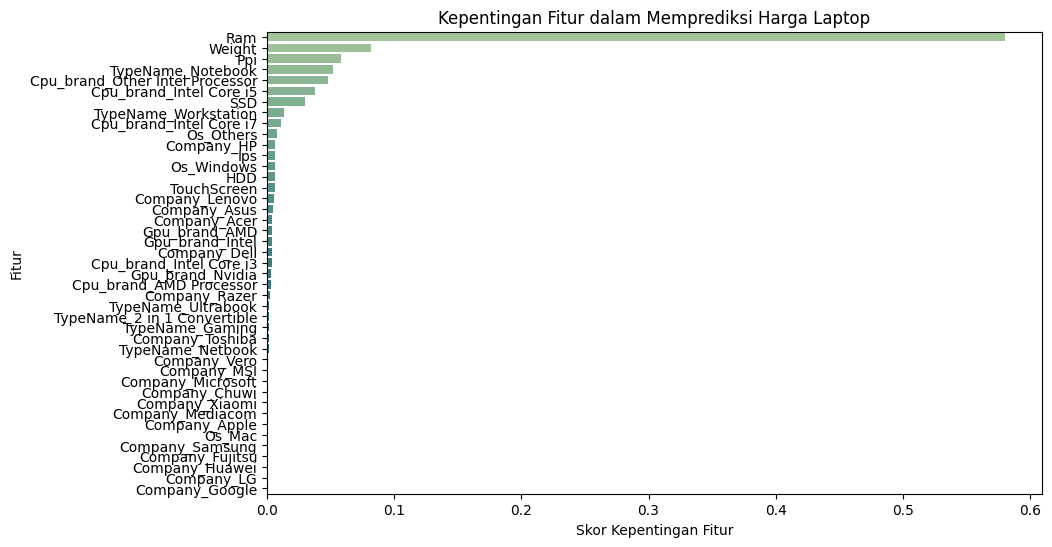

In [ ]:
# Mengisi nilai kosong pada target variabel 'Price'
data['Price'].fillna(data['Price'].mean(), inplace=True)

# Pilih variabel yang sesuai dengan spesifikasi yang disebutkan
fitur_terpilih = ['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD'] + \
                 [col for col in data.columns if col.startswith(('Company_', 'TypeName_', 'Cpu_brand_', 'Gpu_brand_', 'Os_'))]

X = data[fitur_terpilih]  # Data fitur
y = data['Price']  # Target harga

# Membuat model Random Forest Regressor dan melatihnya
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Mendapatkan tingkat kepentingan fitur
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Menampilkan hasil kepentingan fitur
print("Feature Importance:\n", feature_importance_df)

# Visualisasi tingkat kepentingan fitur
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette="crest")
plt.xlabel('Skor Kepentingan Fitur')
plt.ylabel('Fitur')
plt.title("Kepentingan Fitur dalam Memprediksi Harga Laptop")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Pilih variabel spesifikasi yang relevan sebagai fitur dan target
fitur = ['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD'] + \
        [col for col in data.columns if col.startswith(('Company_', 'TypeName_', 'Cpu_brand_', 'Gpu_brand_', 'Os_'))]
X = data[fitur]  # Fitur-fitur dari spesifikasi laptop
y = data['Price']  # Target variabel

# Menangani nilai NaN dengan mengisi rata-rata
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisiasi model Linear Regression dan latih pada data training
model_regresi = LinearRegression()
model_regresi.fit(X_train, y_train)

# Prediksi harga laptop pada data testing
y_pred = model_regresi.predict(X_test)

# Evaluasi performa model
print("MAE (Mean Absolute Error):", mean_absolute_error(y_test, y_pred))
print("MSE (Mean Squared Error):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Tampilkan Intercept dan Koefisien
print("Intercept:", model_regresi.intercept_)
print("Koefisien setiap fitur:")
print(pd.Series(model_regresi.coef_, index=X.columns).sort_values(ascending=False))

MAE (Mean Absolute Error): 0.21831862491738763
MSE (Mean Squared Error): 0.08184524529339027
R² Score: 0.7782567075269207
Intercept: 9.833327653704307
Koefisien setiap fitur:
Company_Razer                      0.433383
TypeName_Workstation               0.375964
Company_LG                         0.350489
Company_Google                     0.331813
Company_Microsoft                  0.318157
Cpu_brand_Intel Core i7            0.282728
Cpu_brand_Intel Core i5            0.237246
Company_Toshiba                    0.193456
Company_MSI                        0.173259
Company_Samsung                    0.163627
Os_Mac                             0.122096
Company_Apple                      0.122096
Company_HP                         0.104576
Weight                             0.078084
Os_Windows                         0.059174
TypeName_Ultrabook                 0.052401
Company_Dell                       0.051070
Ips                                0.047933
Ram                              

# No.3

# Insight Nomor 1

**Insight**


**1. Cluster dengan pendapatan Menengah**

**Profil**: Pelanggan dengan pendapatan menengah cenderung memiliki keseimbangan dalam aktivitas online mereka. Mereka melakukan pembelian baik secara online (6 kali jumlah visit) maupun di toko fisik (7 kali num store purchase) dengan frekuensi yang cukup tinggi.

**Perilaku**: Mereka sering mengunjungi situs web (Di data yang telah dianalisis yaitu sebanyak 6 kali), menunjukkan minat yang cukup besar terhadap produk atau layanan yang ditawarkan. Dari segi demografi, usia mereka cenderung lebih tua (58 tahun) dibandingkan cluster rendah (51 tahun), dan lebih tua 2 tahun dari cluster tinggi (56 tahun).


**2. Cluster dengan pendapatan Rendah**

**Profil**: Pelanggan dengan pendapatan rendah lebih sering melakukan pembelian di toko fisik (rata-rata 3 kali pembelian) dibandingkan secara online (2 kali pembelian). Frekuensi kunjungan ke situs web mereka juga cukup tinggi yaitu 6 kali kunjungan per bulan, namun jumlah pembelian online mereka relatif lebih rendah, yaitu hanya 2 kali.

**Perilaku**: Meskipun anggaran terbatas, mereka tetap aktif berinteraksi dengan platform online. Hal ini bisa mengindikasikan bahwa mereka sering melakukan riset sebelum membeli atau mungkin lebih memilih opsi pembayaran tunai atau kredit yang tersedia di toko fisik.


**3. Cluster dengan pendapatan Tinggi**

**Profil**: Pelanggan dengan pendapatan tinggi cenderung lebih sering melakukan pembelian fisik (8 kali pembelian) dibandingkan di toko online 4 kali pembelian. Namun, frekuensi kunjungan ke situs web mereka relatif lebih rendah yaitu 2 kunjungan dibandingkan cluster menengah dan rendah.

**Perilaku**: Mereka lebih cenderung menjadi pembeli yang efisien, langsung pada tujuan. Datang ke toko daripada membeli via website.


# Rekomendasi Nomor 1



1.   Bisa mulai menjalankan iklan untuk website, karena dari website bisa menarik pelanggan untuk melakukan pembelian.

2. Penjual juga bisa memberikan voucher diskon di hari-hari tertentu untuk meningkatkan penjualan.

3. Penjual juga bisa memnjalankan marketing campaigne sesuai target market secara bertahap. Misal Campaign pertama untuk target market kelan pendapatan rendah, bisa membuat campaign “Laptop Berkualitas, Harga Murah, Tanpa batas Cicilan”, dilanjutkan dengan membuat campaign sesuai target market selanjutnya.





# Insight Nomor 2

1. **RAM**: Kapasitas RAM merupakan faktor paling dominan dalam menentukan harga laptop. Semakin besar kapasitas RAM, semakin tinggi pula harga laptop. Ini menunjukkan bahwa konsumen sangat menghargai kinerja laptop yang cepat dan responsif.

2. **Processor**: Jenis processor, terutama dari merek-merek terkenal seperti Intel Core i7, sangat mempengaruhi harga.

3. **Storage**: Baik HDD maupun SSD memiliki pengaruh yang signifikan terhadap harga. SSD yang memiliki kecepatan baca dan tulis yang lebih tinggi umumnya lebih mahal dibandingkan HDD.

# Rekomendasi Nomor 2

**Rekomendasi**

1. Penjual bisa mencoba untuk mencari merek laptop dengan spesifikasi bagus namun dengan harga yang relatif terjangkau. Lebih tepatnya cari diferensiasi karena biasanya Spesifikasi bagus, harganya mahal.

2. Memberikan garansi dan pelayanan yang baik mengingat harga laptop mahal.

3. Menawarkan promosi yang menarik, seperti diskon khusus untuk pembelian dalam jumlah tertentu atau pada waktu-waktu tertentu dan memberikan bonus tambahan seperti voucher belanja atau aksesori gratis.